[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/figs_3_4_5.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/deJong_Mackay_et_al_2023/figs_3_4_5.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/figs_3_4_5.ipynb)

TODO #1417

In [5]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [ ]:
import os
from PySDM.physics import si
from PySDM_examples.Srivastava_1982 import coalescence_and_breakup_eq13, Settings
from open_atmos_jupyter_utils import show_plot

In [ ]:
dt = 1 * si.s
dv = 1 * si.m**3
drop_mass_0=1 * si.g
total_number=1e6

CI = 'CI' in os.environ

n_realisations = 10 if not CI else 2
n_steps = 2048 if not CI else 1

In [ ]:
title = "fig4_coalescence-only"
c = 0.5e-6 / si.s
beta = 1e-15 / si.s
frag_mass = -1 * si.g

n_sds = (8, 32, 128, 256) if not CI else (8, 16)

settings = Settings(
    srivastava_c=c,
    srivastava_beta=beta,
    frag_mass=frag_mass,
    drop_mass_0=drop_mass_0,
    dt=dt,
    dv=dv,
    n_sds=n_sds,
    total_number=total_number,
)
coalescence_and_breakup_eq13(
    settings,
    n_steps=n_steps,
    n_realisations=n_realisations,
)
show_plot(f'{title}.pdf')

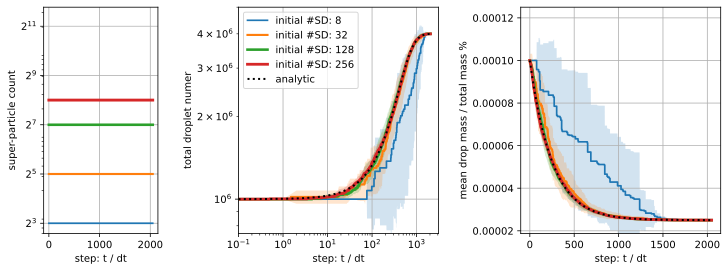

In [5]:
title = "fig3_breakup-only"
c =  1e-15 / si.s
beta = 1e-9 / si.s
frag_mass = 0.25 * si.g

n_sds = (8, 32, 128, 256) if not CI else (8, 16)

settings = Settings(
    srivastava_c=c,
    srivastava_beta=beta,
    frag_mass=frag_mass,
    drop_mass_0=drop_mass_0,
    dt=dt,
    dv=dv,
    n_sds=n_sds,
    total_number=total_number,
)
coalescence_and_breakup_eq13(
    settings,
    n_steps=n_steps,
    n_realisations=n_realisations,
)
show_plot(f'{title}.pdf')

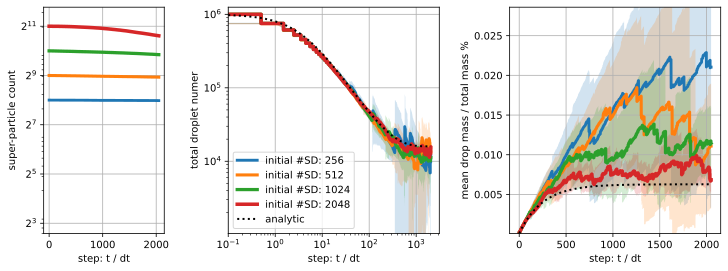

In [6]:
title = "fig5_coalescence-breakup"
c =  0.5e-6 / si.s
beta = 1e-9 / si.s
frag_mass = 0.25 * si.g

n_sds = [2 ** power for power in range(8, 12)] if not CI else (8, 16)

settings = Settings(
    srivastava_c=c,
    srivastava_beta=beta,
    frag_mass=frag_mass,
    drop_mass_0=drop_mass_0,
    dt=dt,
    dv=dv,
    n_sds=n_sds,
    total_number=total_number,
)
coalescence_and_breakup_eq13(
    settings,
    n_steps=n_steps,
    n_realisations=n_realisations,
)
show_plot(f'{title}.pdf')